In [ ]:
# This reads in
# 1. FITS header information
# 2. FFT information about the PSF
# ... in order to figure out whether a Fizeau PSF consists of
# well-overlapped Airy PSFs that are stable other than phase diversity

# created 2018 Nov 26 by E.S.

In [1]:
# Import stuff

import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy.io import fits
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
# Read in the metadata file of FITS header information

fits_table = pd.read_csv('fizeau_altair_180507_metadata.csv')

# sort table by frame number (a few are out of order)
fits_table.sort_values(["FRAMENUM"], inplace=True)
fits_table = fits_table.reset_index(drop=True) # reset indices and don't keep the old ones

/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (13,80,81,84,88,92,149) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Read in the PSF FFT information

fft_table = pd.read_csv('fizeau_altair_180507_psf_fft_info.csv')

In [ ]:
# apply cutoffs and generate list of frame numbers that pass

# FITs keys cutoffs:

# ["PCCLOSED"]==1
# ["LLOOPON"]==1
# ["RLOOPON"]==1
# ["ACTEXP"]=="145976"
# ["LMIR_FW1"]=="94800"
# ["LMIR_FW2"]=="ND1.0-T10"
# ["LMIRFW25"]=="Lspec2.8-4.0" OR "Open" (may have to keep these filters distinct later)
# ["LMIR_FW3"]=="Lgrism6AR"
# ["LMIR_FW4"]=="Br-Alpha-On"

In [ ]:
# now, make two lists of frame numbers sieved from the previous list:
# 1.  one of frame numbers which meet the FFT cutoff of there being
#     enough power in the high-freq nodes (use plots I already made)
# 2.  one of frame numbers which do NOT meet that (can I see poor Airy 
#     overlap Phil is worried about?)

# (let the Fizeau PSF phase vary for now)

In [ ]:
fft_table[""]

In [4]:
fft_table.keys()

Index([u'framenum', u'ampl_med_highFreqPerfect_L',
       u'ampl_med_highFreqPerfect_R', u'ampl_med_lowFreqPerfect',
       u'ampl_med_rect', u'ampl_normVec_highFreqPerfect_L_x',
       u'ampl_normVec_highFreqPerfect_L_y',
       u'ampl_normVec_highFreqPerfect_R_x',
       u'ampl_normVec_highFreqPerfect_R_y', u'ampl_normVec_lowFreqPerfect_x',
       u'ampl_normVec_lowFreqPerfect_y', u'ampl_normVec_rect_x',
       u'ampl_normVec_rect_y', u'phase_med_highFreqPerfect_L',
       u'phase_med_highFreqPerfect_R', u'phase_med_lowFreqPerfect',
       u'phase_med_rect', u'phase_normVec_highFreqPerfect_L_x',
       u'phase_normVec_highFreqPerfect_L_y',
       u'phase_normVec_highFreqPerfect_R_x',
       u'phase_normVec_highFreqPerfect_R_y', u'phase_normVec_lowFreqPerfect_x',
       u'phase_normVec_lowFreqPerfect_y', u'phase_normVec_rect_x',
       u'phase_normVec_rect_y'],
      dtype='object')

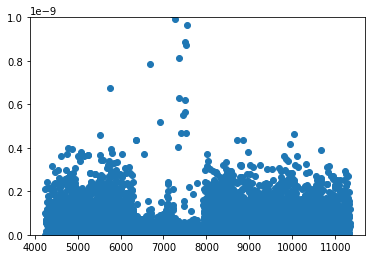

In [8]:
plt.scatter(fft_table['framenum'],fft_table['ampl_normVec_lowFreqPerfect_x'])
plt.ylim([0,1E-9])
plt.show()